# BADM 575 Homework 2
##### Submitted by: Kanchan Singh

## Import Libraries

In [8]:
import pandas as pd 
import numpy as np
import statistics as st
import scipy.stats as stat
import math
import matplotlib as mlp 
import matplotlib.pyplot as plt
import statsmodels
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import torch 
import torch.nn as nn
import torch.optim as optim
from torch.nn import functional as F
from torchviz import make_dot
import sklearn 
import scipy.optimize as opt
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression

import warnings

warnings.filterwarnings("ignore")
# install packages with requirements.txt
# !pip install -r ../requirements.txt
# !pip3 freeze > requirements.txt

# Define a color palette for the pie charts
colors = ['#ff9999', '#66b3ff']  # You can customize the colors as needed
layout = dict(plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)')


## Load Data

In [9]:
df = pd.read_csv('BikeDemandDaily.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          456 non-null    int64  
 1   year           456 non-null    int64  
 2   month          456 non-null    int64  
 3   day            456 non-null    int64  
 4   season         456 non-null    int64  
 5   holiday        456 non-null    int64  
 6   workingday     456 non-null    int64  
 7   meanatemp      456 non-null    float64
 8   maxatemp       456 non-null    float64
 9   minatemp       456 non-null    float64
 10  sdatemp        456 non-null    float64
 11  meanhumidity   456 non-null    float64
 12  maxhumidity    456 non-null    int64  
 13  minhumidity    456 non-null    int64  
 14  sdhumidity     456 non-null    float64
 15  meanwindspeed  456 non-null    float64
 16  maxwindspeed   456 non-null    float64
 17  minwindspeed   456 non-null    float64
 18  sdwindspee

## Part A. Disaggregated Demand Forecasting and aggregating up
### A1. Graphical comparison of registered and casual demand
#### Part (i)

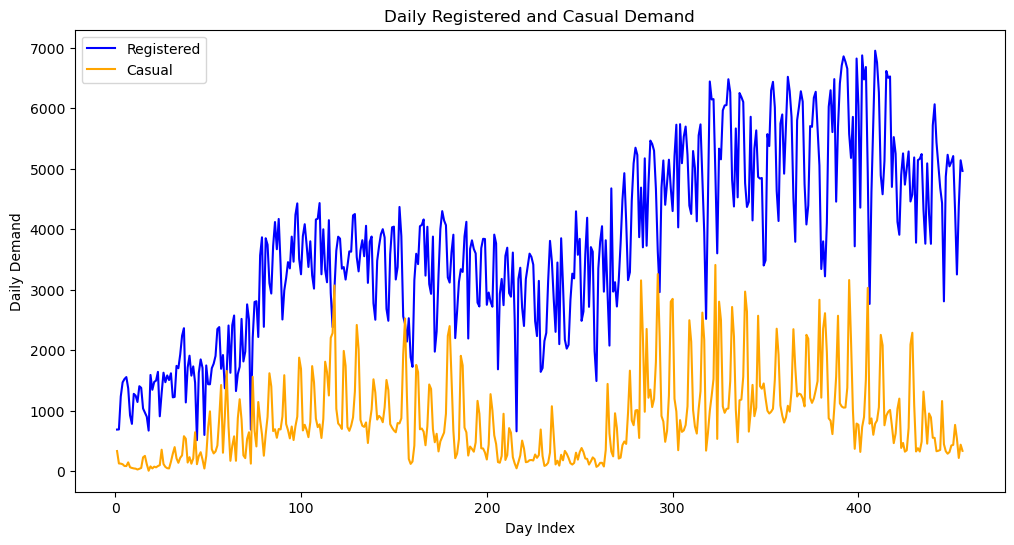

In [10]:
plt.figure(figsize=(12, 6))

# Plotting Daily Registered Demand
plt.plot(df['Index'], df['Registered'], label='Registered', color='blue')

# Plotting Daily Casual Demand
plt.plot(df['Index'], df['Casual'], label='Casual', color='orange')

# Adding labels and title
plt.xlabel('Day Index')
plt.ylabel('Daily Demand')
plt.title('Daily Registered and Casual Demand')
plt.legend()

# Show the plot
plt.show()

##### Something about the patterns

#### Part (ii) a.

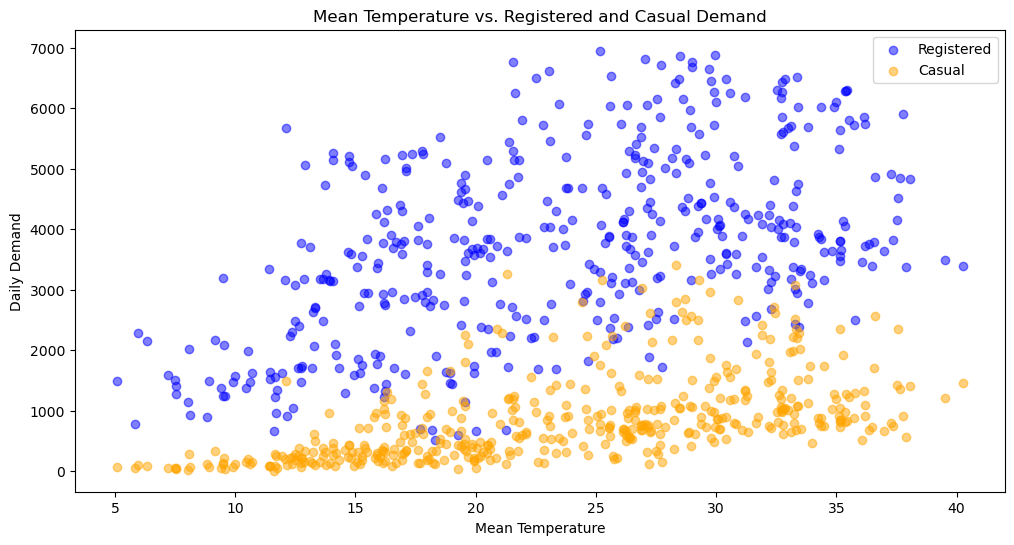

In [11]:
# Scatter diagram for Mean Temperature versus Registered and Casual Demand
plt.figure(figsize=(12, 6))
plt.scatter(df['meanatemp'], df['Registered'], label='Registered', color='blue', alpha=0.5)
plt.scatter(df['meanatemp'], df['Casual'], label='Casual', color='orange', alpha=0.5)
plt.xlabel('Mean Temperature')
plt.ylabel('Daily Demand')
plt.title('Mean Temperature vs. Registered and Casual Demand')
plt.legend()
plt.show()

#### Part (ii) b.

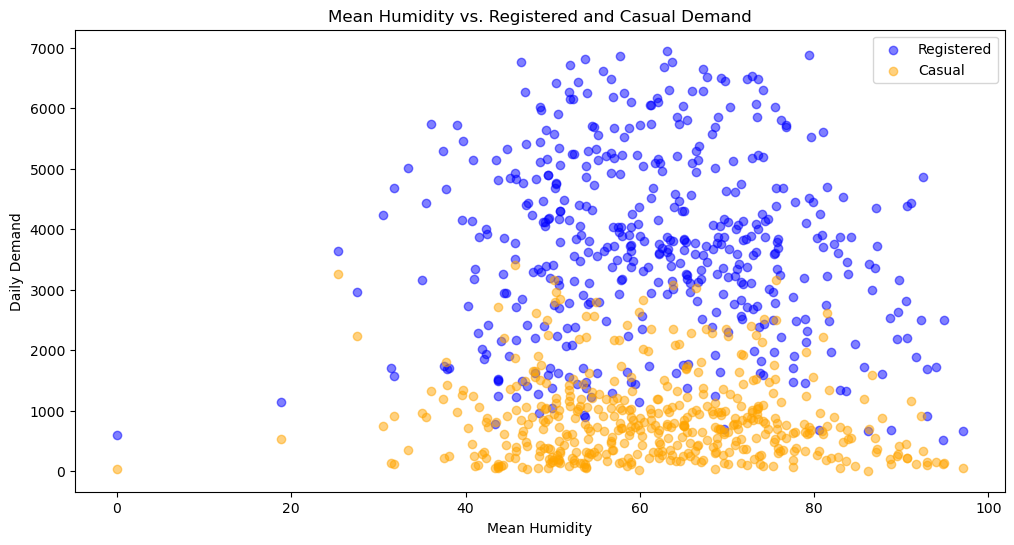

In [12]:
# Scatter diagram for Mean Humidity versus Registered and Casual Demand
plt.figure(figsize=(12, 6))
plt.scatter(df['meanhumidity'], df['Registered'], label='Registered', color='blue', alpha=0.5)
plt.scatter(df['meanhumidity'], df['Casual'], label='Casual', color='orange', alpha=0.5)
plt.xlabel('Mean Humidity')
plt.ylabel('Daily Demand')
plt.title('Mean Humidity vs. Registered and Casual Demand')
plt.legend()
plt.show()

#### Part (ii) c.

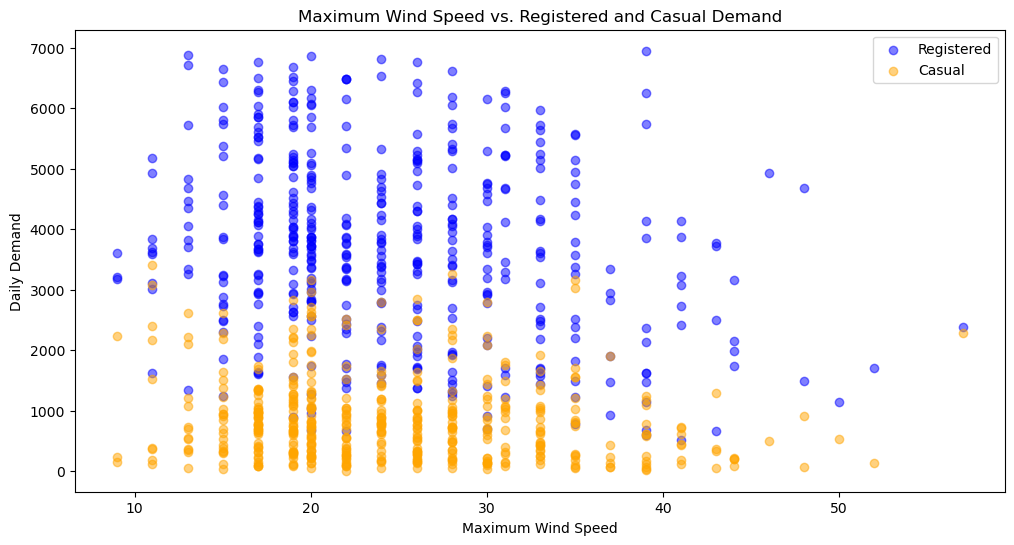

In [13]:
# Scatter diagram for Maximum Wind Speed versus Registered and Casual Demand
plt.figure(figsize=(12, 6))
plt.scatter(df['maxwindspeed'], df['Registered'], label='Registered', color='blue', alpha=0.5)
plt.scatter(df['maxwindspeed'], df['Casual'], label='Casual', color='orange', alpha=0.5)
plt.xlabel('Maximum Wind Speed')
plt.ylabel('Daily Demand')
plt.title('Maximum Wind Speed vs. Registered and Casual Demand')
plt.legend()
plt.show()

#### Part (ii) d.

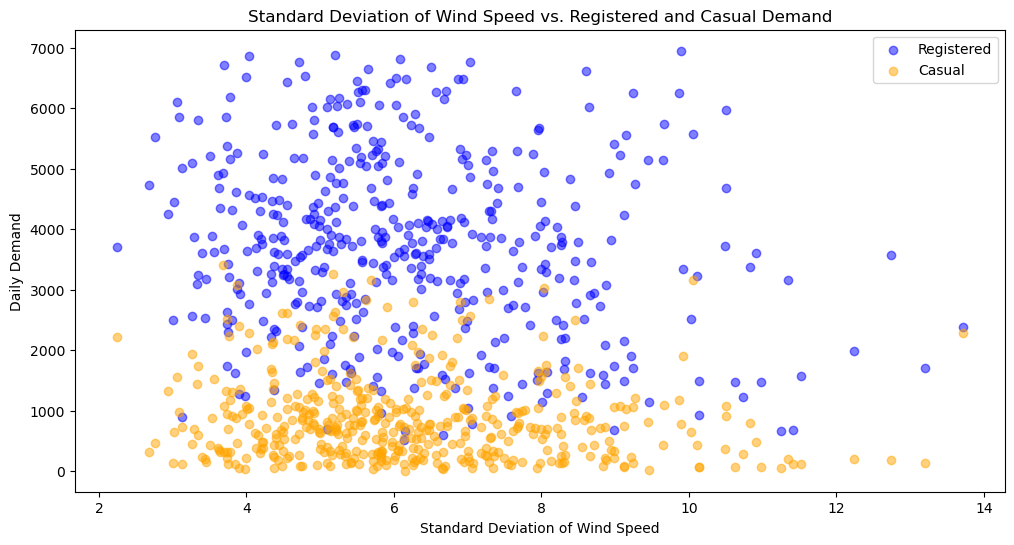

In [14]:
# Scatter diagram for Standard Deviation of Wind Speed versus Registered and Casual Demand
plt.figure(figsize=(12, 6))
plt.scatter(df['sdwindspeed'], df['Registered'], label='Registered', color='blue', alpha=0.5)
plt.scatter(df['sdwindspeed'], df['Casual'], label='Casual', color='orange', alpha=0.5)
plt.xlabel('Standard Deviation of Wind Speed')
plt.ylabel('Daily Demand')
plt.title('Standard Deviation of Wind Speed vs. Registered and Casual Demand')
plt.legend()
plt.show()

#### Part (ii) e.
##### From the scatter plots, we observe that ...

#### Part (iii) a.

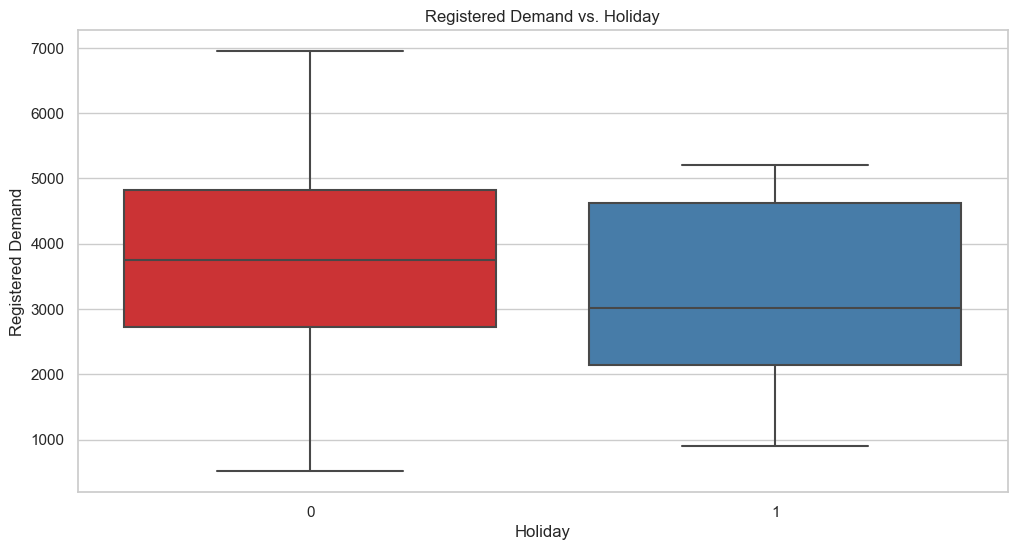

In [15]:
sns.set(style="whitegrid")
# Box plot for Registered Demand vs. Holiday
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['holiday'], y=df['Registered'], palette="Set1")
plt.xlabel('Holiday')
plt.ylabel('Registered Demand')
plt.title('Registered Demand vs. Holiday')
plt.show()

#### Part (iii) b.

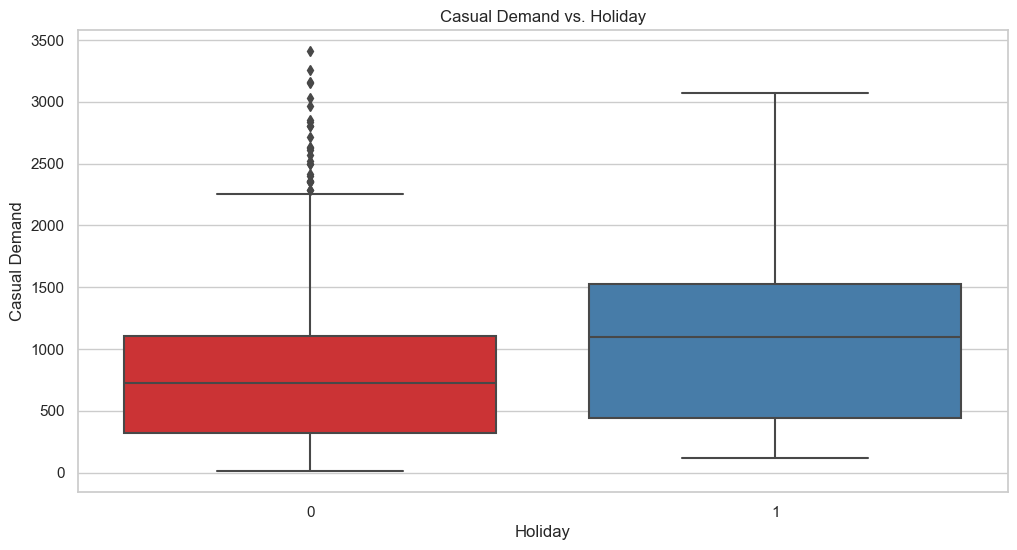

In [16]:
# Box plot for Casual Demand vs. Holiday
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['holiday'], y=df['Casual'], palette="Set1")
plt.xlabel('Holiday')
plt.ylabel('Casual Demand')
plt.title('Casual Demand vs. Holiday')
plt.show()

#### Part (iii) c.

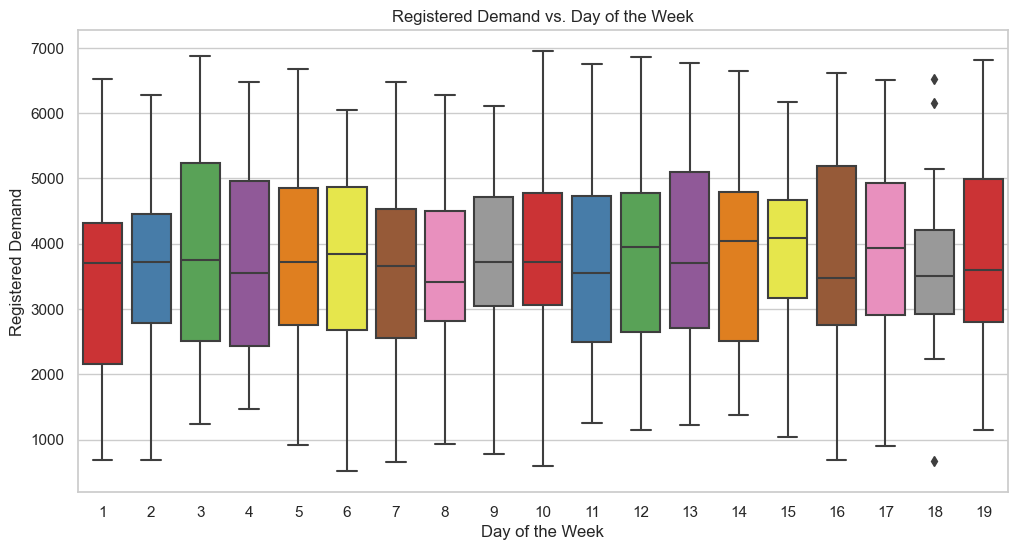

In [17]:
# Box plot for Registered Demand vs. Day of the Week
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['day'], y=df['Registered'], palette="Set1")
plt.xlabel('Day of the Week')
plt.ylabel('Registered Demand')
plt.title('Registered Demand vs. Day of the Week')
plt.show()

#### Part (iii) d.

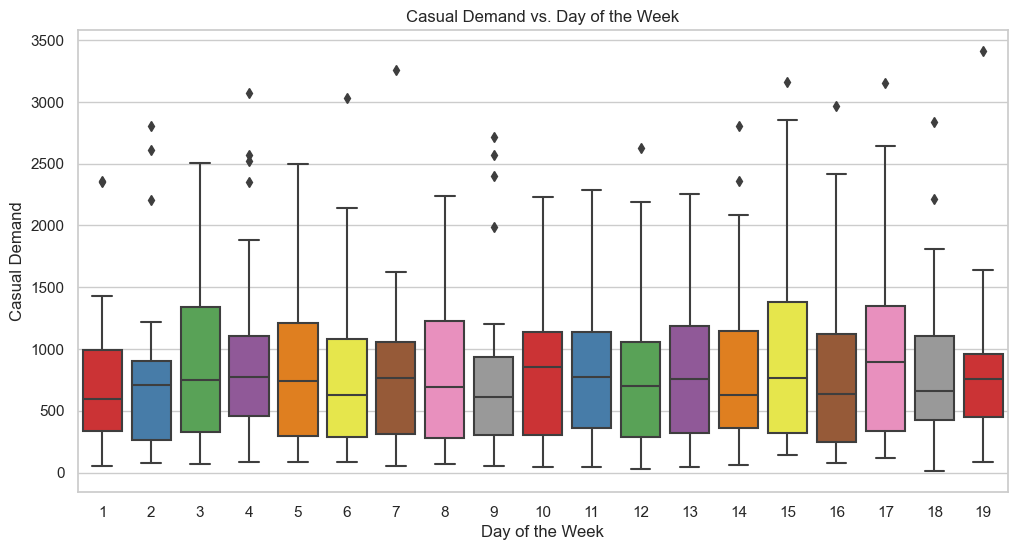

In [18]:
# Box plot for Casual Demand vs. Day of the Week
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['day'], y=df['Casual'], palette="Set1")
plt.xlabel('Day of the Week')
plt.ylabel('Casual Demand')
plt.title('Casual Demand vs. Day of the Week')
plt.show()

#### Part (iii) e.
##### We observe ...

### A2. Create LASSO models for registered demand and causal demand separately
#### Part (i)

In [19]:
# Splitting df into test and train sets based on day Index
train_set = df[df['Index'] <= 300]
test_set = df[df['Index'] > 300]

#### Part (ii)

##### Test-train split

In [20]:
# Creating X and Y for train and test set
X_train = train_set.drop(['Total', 'Casual', 'Registered'], axis=1)
X_test = test_set.drop(['Total', 'Casual', 'Registered'], axis=1)

# Creating separate train and test sets y for Registered, Casual and Total demand
y_train_registered = train_set['Registered']
y_train_casual = train_set['Casual']
y_test_registered = test_set['Registered']
y_test_casual = test_set['Casual']
y_train_total = train_set['Total']
y_test_total = test_set['Total']

# Creating dummy variables for training and testing set X
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

##### Cross-validation and Lasso model for Registered Demand

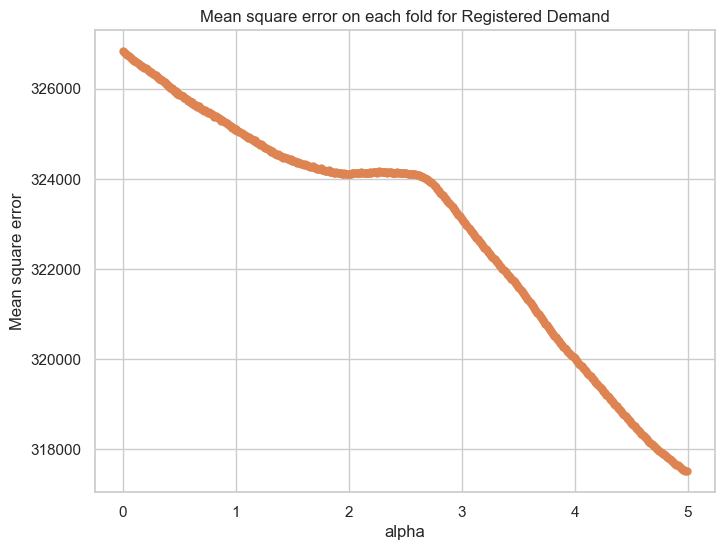

Optimal Cross-Validation Penalty for Registered Demand: 4.99


In [21]:
# Model for Registered Demand
lasso_cv_registered = make_pipeline(StandardScaler(), LassoCV(alphas=np.arange(0, 5, 0.01), cv=10))
lasso_cv_registered.fit(X_train, y_train_registered)

# Plotting MSE for Registered Demand
mse_path_registered = np.mean(lasso_cv_registered.named_steps['lassocv'].mse_path_, axis=1)
alphas_registered = lasso_cv_registered.named_steps['lassocv'].alphas_

plt.figure(figsize=(8, 6))
plt.plot(alphas_registered, mse_path_registered, ':')
plt.plot(alphas_registered, mse_path_registered, 'o', markersize=5)
plt.xlabel('alpha')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold for Registered Demand')
plt.axis('tight')
plt.show()

# Optimal cross-validation penalty for Registered Demand
best_alpha_registered = lasso_cv_registered.named_steps['lassocv'].alpha_
print(f'Optimal Cross-Validation Penalty for Registered Demand: {best_alpha_registered}')

##### Cross-validation and Lasso model for Casual Demand

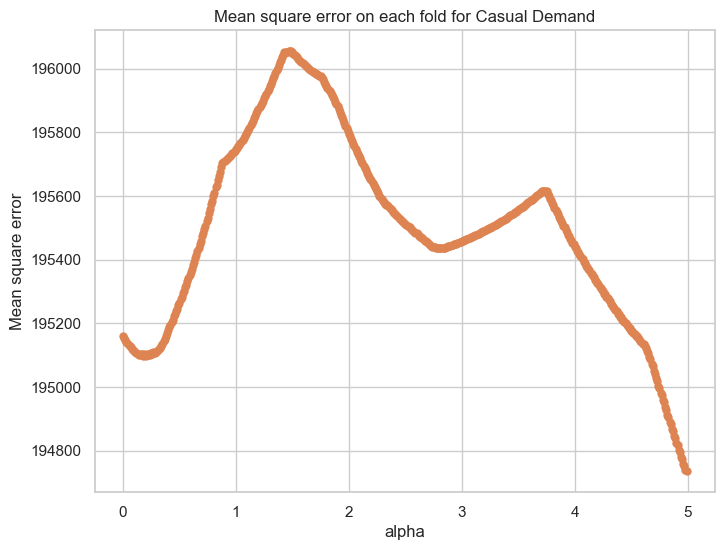

Optimal Cross-Validation Penalty for Casual Demand: 4.99


In [22]:
# Model for Casual Demand
lasso_cv_casual = make_pipeline(StandardScaler(), LassoCV(alphas=np.arange(0, 5, 0.01), cv=10))
lasso_cv_casual.fit(X_train, y_train_casual)

# Plotting MSE for Casual Demand
mse_path_casual = np.mean(lasso_cv_casual.named_steps['lassocv'].mse_path_, axis=1)
alphas_casual = lasso_cv_casual.named_steps['lassocv'].alphas_

plt.figure(figsize=(8, 6))
plt.plot(alphas_casual, mse_path_casual, ':')
plt.plot(alphas_casual, mse_path_casual, 'o', markersize=5)
plt.xlabel('alpha')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold for Casual Demand')
plt.axis('tight')
plt.show()

# Optimal cross-validation penalty for Casual Demand
best_alpha_casual = lasso_cv_casual.named_steps['lassocv'].alpha_
print(f'Optimal Cross-Validation Penalty for Casual Demand: {best_alpha_casual}')

#### Part (iii)

In [23]:
# Final LASSO model for Registered Demand using the optimal penalty
lasso_final_registered = make_pipeline(StandardScaler(), Lasso(alpha=best_alpha_registered))
lasso_final_registered.fit(X_train, y_train_registered)

# Final LASSO model for Casual Demand using the optimal penalty
lasso_final_casual = make_pipeline(StandardScaler(), Lasso(alpha=best_alpha_casual))
lasso_final_casual.fit(X_train, y_train_casual)

# Print the selected variables for Registered Demand
betas_registered = lasso_final_registered.named_steps['lasso'].coef_
print("Selected variables for Registered Demand:")
for feature, coef in zip(X_train.columns, betas_registered):
    if coef != 0:
        print(f'{feature}: {coef}')

# Print the selected variables for Casual Demand
betas_casual = lasso_final_casual.named_steps['lasso'].coef_
print("\nSelected variables for Casual Demand:")
for feature, coef in zip(X_train.columns, betas_casual):
    if coef != 0:
        print(f'{feature}: {coef}')

Selected variables for Registered Demand:
Index: 645.3345779828096
season: -7.056655897725426
workingday: 286.98235941215853
meanatemp: 187.96998662482846
minatemp: 386.8256680675697
sdatemp: 79.84215904392607
meanhumidity: -173.88425807803114
minhumidity: -66.2531913675043
sdhumidity: 101.77151569838526
maxwindspeed: -177.54078010728617
minwindspeed: -0.5810687000890662

Selected variables for Casual Demand:
year: 106.28881859341375
month: -19.420610069476176
season: 53.899375743335284
holiday: -25.50254536194067
workingday: -349.90994034505724
meanatemp: 329.32015542167096
minatemp: 43.80731648291723
sdatemp: 59.06168142413425
meanhumidity: -109.70558356186365
sdhumidity: 9.19371656856941
meanwindspeed: -59.860757630233046
maxwindspeed: -9.26956656099529
sdwindspeed: -30.443351152548075


##### Comment on selected variables or each model

#### Part (iv)

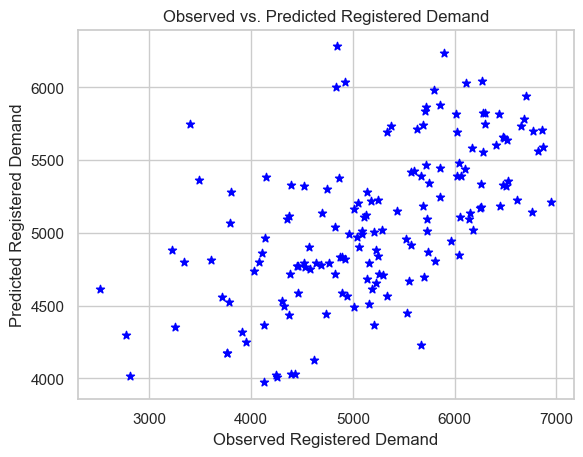

RMSE on the testing set for Registered Demand: 785.1386675246061


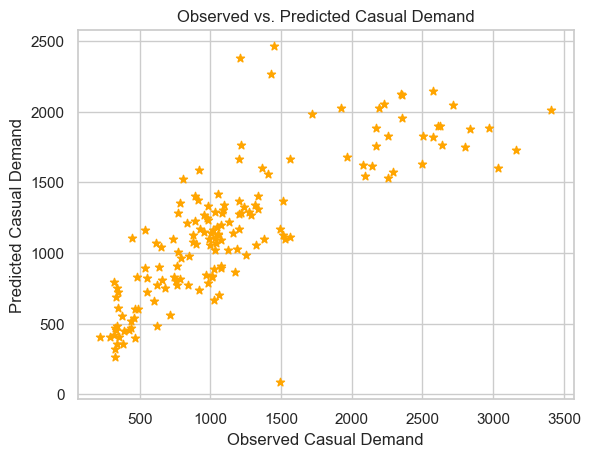

RMSE on the testing set for Casual Demand: 436.072471545528


In [24]:
# Predict the testing set for Registered Demand
y_pred_registered = lasso_final_registered.predict(X_test)

# Plotting Observed vs. Predicted Demand for Registered Demand
plt.scatter(y_test_registered, y_pred_registered, marker='*', color='blue')
plt.xlabel('Observed Registered Demand')
plt.ylabel('Predicted Registered Demand')
plt.title('Observed vs. Predicted Registered Demand')
plt.show()

# RMSE for Registered Demand
rmse_registered = sqrt(mean_squared_error(y_test_registered, y_pred_registered))
print(f'RMSE on the testing set for Registered Demand: {rmse_registered}')

# Predict the testing set for Casual Demand
y_pred_casual = lasso_final_casual.predict(X_test)

# Plotting Observed vs. Predicted Demand for Casual Demand
plt.scatter(y_test_casual, y_pred_casual, marker='*', color='orange')
plt.xlabel('Observed Casual Demand')
plt.ylabel('Predicted Casual Demand')
plt.title('Observed vs. Predicted Casual Demand')
plt.show()

# RMSE for Casual Demand
rmse_casual = sqrt(mean_squared_error(y_test_casual, y_pred_casual))
print(f'RMSE on the testing set for Casual Demand: {rmse_casual}')

#### Part (v)

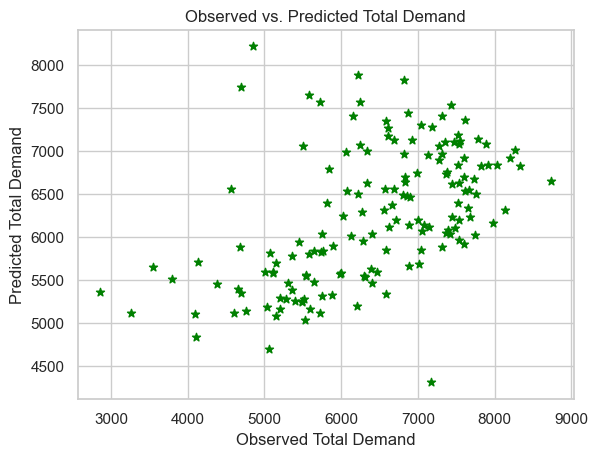

RMSE on the testing set for Total Demand: 1009.985748817657


In [44]:
# Predict the testing set for Registered Demand
y_pred_registered = lasso_final_registered.predict(X_test)

# Predict the testing set for Casual Demand
y_pred_casual = lasso_final_casual.predict(X_test)

# Add predictions to get Total Demand
y_pred_total = y_pred_registered + y_pred_casual

# Plotting Observed vs. Predicted Demand for Total Demand
plt.scatter(test_set['Total'], y_pred_total, marker='*', color='green')
plt.xlabel('Observed Total Demand')
plt.ylabel('Predicted Total Demand')
plt.title('Observed vs. Predicted Total Demand')
plt.show()

# Calculate Root Mean Squared Error (RMSE) for Total Demand
rmse_total = sqrt(mean_squared_error(test_set['Total'], y_pred_total))
print(f'RMSE on the testing set for Total Demand: {rmse_total}')

### A3. Time series prediction models – Auto Regressive Moving Average (ARMA)
#### Part (i)

In [26]:
# Function to create and summarize linear regression models
X_train_registered = X_train[X_train.columns[betas_registered != 0]]
def linear_regression_summary(X_train, y_train, selected_features, demand_type):
    # Select only the relevant features from the training set
    X_train_selected = X_train[selected_features]

    # Add a constant term to the features
    X_train_selected = sm.add_constant(X_train_selected)

    # Fit the linear regression model
    model = sm.OLS(y_train, X_train_selected)
    results = model.fit()
    
    # Print the summary of the regression
    print(f"Linear Regression Summary for {demand_type} Demand:")
    print(results.summary())
    
    # Return the fitted model for future predictions
    return results
    
# Apply the function for Registered Demand
linear_regression_summary(X_train, y_train_registered, X_train.columns[betas_registered != 0], "Registered")

# Apply the function for Casual Demand
linear_regression_summary(X_train, y_train_casual, X_train.columns[betas_casual != 0], "Casual")

Linear Regression Summary for Registered Demand:


                            OLS Regression Results                            
Dep. Variable:             Registered   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     117.7
Date:                Fri, 15 Mar 2024   Prob (F-statistic):           1.20e-99
Time:                        00:11:59   Log-Likelihood:                -2269.1
No. Observations:                 300   AIC:                             4562.
Df Residuals:                     288   BIC:                             4607.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1043.1108    214.971      4.852   

##### Comment on important predictors

#### Part (ii)

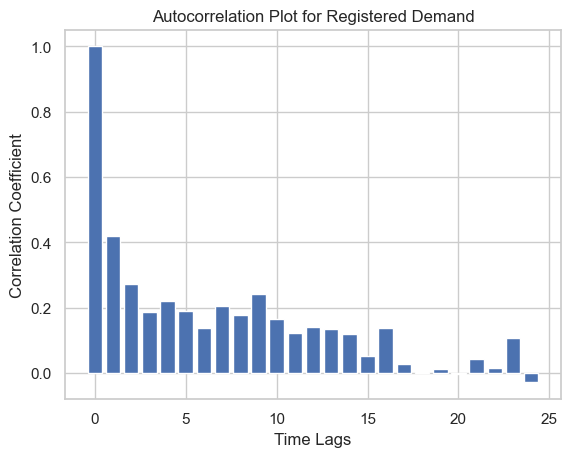

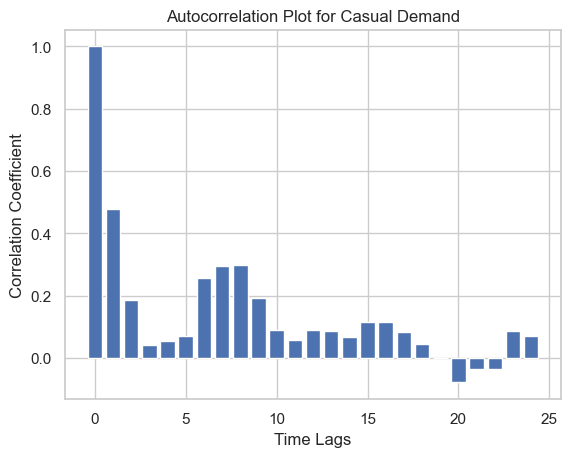

In [27]:
# Residuals for regression model of registered demand
model_registered = LinearRegression().fit(X_train[X_train.columns[betas_registered != 0]], y_train_registered)
y_pred_registered = model_registered.predict(X_train[X_train.columns[betas_registered != 0]])
errors_registered = y_train_registered - y_pred_registered

# Residuals for regression model of casual demand
model_casual = LinearRegression().fit(X_train[X_train.columns[betas_casual != 0]], y_train_casual)
y_pred_casual = model_casual.predict(X_train[X_train.columns[betas_casual != 0]])
errors_casual = y_train_casual - y_pred_casual

# ACF for registered demand
acf_registered = smt.acf(errors_registered)
plt.bar(range(len(acf_registered)),acf_registered)
plt.xlabel('Time Lags')
plt.ylabel('Correlation Coefficient')
plt.title('Autocorrelation Plot for Registered Demand')
plt.show()

# ACF for casual demand
acf_casual = smt.acf(errors_casual)
plt.bar(range(len(acf_casual)),acf_casual)
plt.xlabel('Time Lags')
plt.ylabel('Correlation Coefficient')
plt.title('Autocorrelation Plot for Casual Demand')
plt.show()

##### Which one has more correaltion and why? - I think registered demand has a higher correlation

# OR

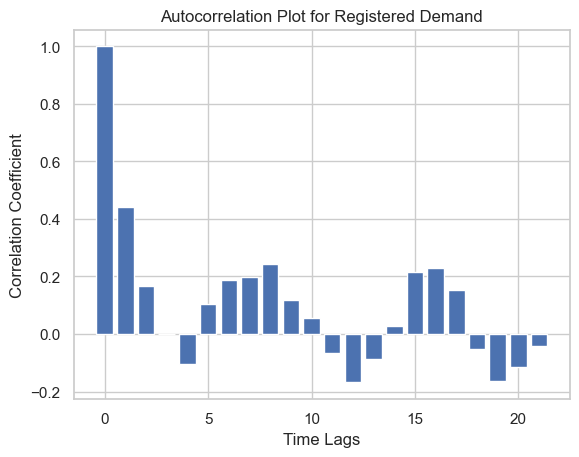

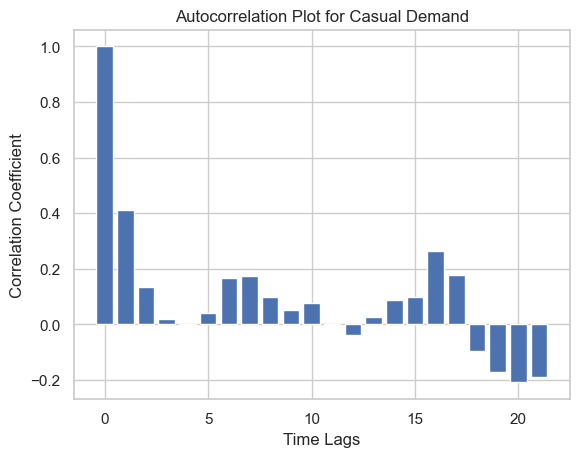

In [28]:
# Why does this plot look so weird?

# Residuals for regression model of registered demand
model_registered = LinearRegression().fit(X_train[X_train.columns[betas_registered != 0]], y_train_registered)
y_pred_registered = model_registered.predict(X_test[X_test.columns[betas_registered != 0]])
errors_registered = y_test_registered - y_pred_registered

# Residuals for regression model of casual demand
model_casual = LinearRegression().fit(X_train[X_train.columns[betas_casual != 0]], y_train_casual)
y_pred_casual = model_casual.predict(X_test[X_test.columns[betas_casual != 0]])
errors_casual = y_test_casual - y_pred_casual

# ACF for registered demand
acf_registered = smt.acf(errors_registered)
plt.bar(range(len(acf_registered)),acf_registered)
plt.xlabel('Time Lags')
plt.ylabel('Correlation Coefficient')
plt.title('Autocorrelation Plot for Registered Demand')
plt.show()

# ACF for casual demand
acf_casual = smt.acf(errors_casual)
plt.bar(range(len(acf_casual)),acf_casual)
plt.xlabel('Time Lags')
plt.ylabel('Correlation Coefficient')
plt.title('Autocorrelation Plot for Casual Demand')
plt.show()

#### Part (iii)

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# ARMA(2,2) model for Registered Demand
arma_registered = SARIMAX(y_train_registered, exog=X_train, order=(2, 0, 2)).fit()
print("ARMA Model Summary for Registered Demand:")
print(arma_registered.summary())

# ARMA(2,2) model for Casual Demand
arma_casual = SARIMAX(y_train_casual, exog=X_train, order=(2, 0, 2)).fit()
print("\nARMA Model Summary for Casual Demand:")
print(arma_casual.summary())

ARMA Model Summary for Registered Demand:
                               SARIMAX Results                                
Dep. Variable:             Registered   No. Observations:                  300
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -2229.180
Date:                Fri, 15 Mar 2024   AIC                           4506.359
Time:                        00:12:09   BIC                           4595.250
Sample:                             0   HQIC                          4541.933
                                - 300                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Index             3.5954      3.052      1.178      0.239      -2.387       9.578
year           1002.7910    402.222      2.493      0.013     214.450    1791.13

#### Part (iv)

In [45]:
# Predict demand for registered and casual customers using ARMA models on the testing set
pred_registered = arma_registered.predict(start=len(y_train_registered), end=len(y_train_registered) + len(y_test_registered) - 1, exog=X_test)
pred_casual = arma_casual.predict(start=len(y_train_casual), end=len(y_train_casual) + len(y_test_casual) - 1, exog=X_test)

# Aggregate individual demands to create total demand forecast
pred_total = pred_registered + pred_casual

# Calculate RMSE for total demand forecast
rmse_total_demand = sqrt(mean_squared_error(test_set['Total'], pred_total))

# Print RMSE
print(f'RMSE for Total Demand Forecast: {rmse_total_demand}')

RMSE for Total Demand Forecast: 960.0850894496693


### Below code is for my reference

In [ ]:
# arma_total = SARIMAX(y_train_total, exog=X_train, order=(2, 0, 2)).fit()
# pred_total = arma_total.predict(start=len(y_train_total), end=len(y_train_total) + len(y_test_total) - 1, exog=X_test)

# rmse_total_demand2 = sqrt(mean_squared_error(y_test_total, pred_total))

# # Print RMSE
# print(f'RMSE for Total Demand Forecast: {rmse_total_demand2}')

### Part B. Aggregate Demand Forecast
#### Part (i)

##### Cross-validation and Lasso model for Total Demand

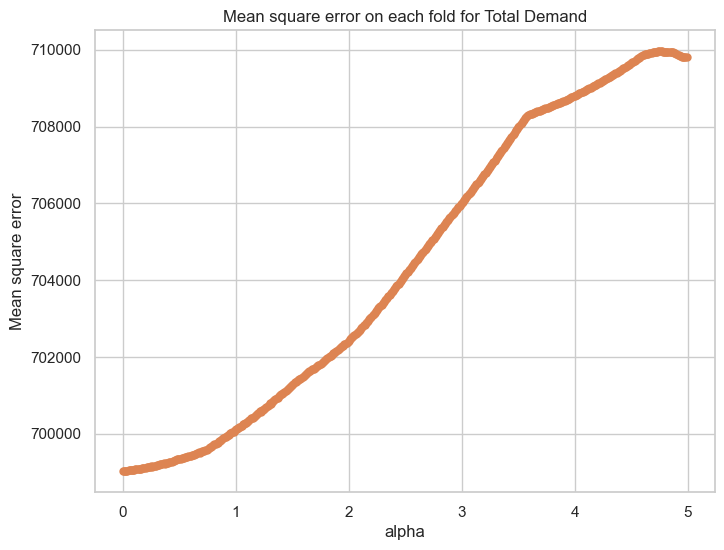

Optimal Cross-Validation Penalty for Registered Demand: 0.0


In [31]:
# Model for Total Demand
lasso_cv_total = make_pipeline(StandardScaler(), LassoCV(alphas=np.arange(0, 5, 0.01), cv=10))
lasso_cv_total.fit(X_train, y_train_total)

# Plotting MSE for Registered Demand
mse_path_total = np.mean(lasso_cv_total.named_steps['lassocv'].mse_path_, axis=1)
alphas_total = lasso_cv_total.named_steps['lassocv'].alphas_

plt.figure(figsize=(8, 6))
plt.plot(alphas_total, mse_path_total, ':')
plt.plot(alphas_total, mse_path_total, 'o', markersize=5)
plt.xlabel('alpha')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold for Total Demand')
plt.axis('tight')
plt.show()

# Optimal cross-validation penalty for Registered Demand
best_alpha_total = lasso_cv_total.named_steps['lassocv'].alpha_
print(f'Optimal Cross-Validation Penalty for Registered Demand: {best_alpha_total}')

##### Variables selected by LASSO

In [32]:
# Final LASSO model for Total Demand using the optimal penalty
lasso_final_total = make_pipeline(StandardScaler(), Lasso(alpha=best_alpha_total))
lasso_final_total.fit(X_train, y_train_total)

# Print the selected variables for Total Demand
betas_total = lasso_final_total.named_steps['lasso'].coef_
print("Selected variables for Total Demand:")
for feature, coef in zip(X_train.columns, betas_total):
    if coef != 0:
        print(f'{feature}: {coef}')

Selected variables for Total Demand:
Index: 635.0159123051526
year: 120.25752345402955
month: -114.15874878097837
day: -12.204635391706798
season: 132.1371104702434
holiday: -26.14043345403832
workingday: -69.41531787390187
meanatemp: 863.3144829906738
maxatemp: -1062.9233051274884
minatemp: 1130.8993403855138
sdatemp: 454.03235983487247
meanhumidity: -373.8283241065594
maxhumidity: 138.66896470051367
minhumidity: -116.91123389293524
sdhumidity: 50.699777544194845
meanwindspeed: -61.1665331110126
maxwindspeed: -211.82603428826243
minwindspeed: 13.95800372375036
sdwindspeed: 0.8777977185644675


##### Comment

#### Predit testing set

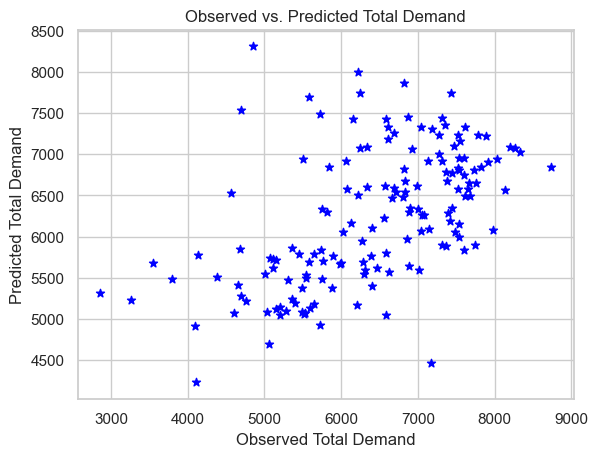

RMSE on the testing set for Total Demand: 993.8829355990076
RMSPE on the testing set for Total Demand: 18.500700530873228


In [36]:
# Predict the testing set for Total Demand
y_pred_total = lasso_final_total.predict(X_test)

# Plotting Observed vs. Predicted Demand for Total Demand
plt.scatter(y_test_total, y_pred_total, marker='*', color='blue')
plt.xlabel('Observed Total Demand')
plt.ylabel('Predicted Total Demand')
plt.title('Observed vs. Predicted Total Demand')
plt.show()

# RMSE for Total Demand
rmse_total = sqrt(mean_squared_error(y_test_total, y_pred_total))
rmspe_total = np.sqrt(np.mean(np.square((y_test_total - y_pred_total) / y_test_total))) * 100
print(f'RMSE on the testing set for Total Demand: {rmse_total}')
print(f'RMSPE on the testing set for Total Demand: {rmspe_total}')

#### Part (ii)

##### Linear regression using variables selected by LASSO

In [38]:
# Applying function for regression (defined earlier) for Total Demand
linear_regression_summary(X_train, y_train_total, X_train.columns[betas_total != 0], "Total")

Linear Regression Summary for Total Demand:
                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     64.80
Date:                Fri, 15 Mar 2024   Prob (F-statistic):           8.32e-89
Time:                        01:02:12   Log-Likelihood:                -2362.4
No. Observations:                 300   AIC:                             4763.
Df Residuals:                     281   BIC:                             4833.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
co

##### Plot of ACF

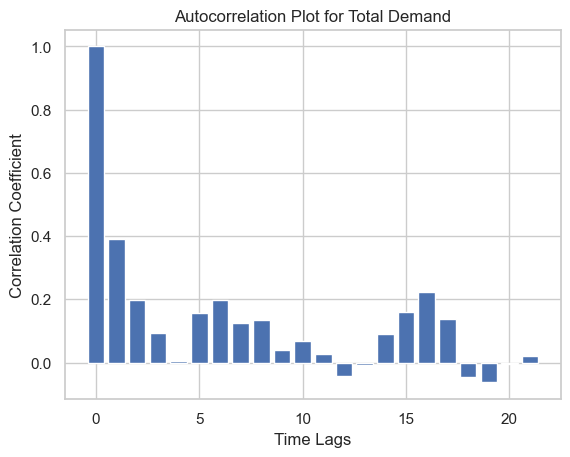

In [41]:
# Residuals for regression model of total demand
model_total = LinearRegression().fit(X_train[X_train.columns[betas_total != 0]], y_train_total)
y_pred_total = model_total.predict(X_test[X_test.columns[betas_total != 0]])
errors_total = y_test_total - y_pred_total

# ACF for total demand
acf_total = smt.acf(errors_total)
plt.bar(range(len(acf_total)),acf_total)
plt.xlabel('Time Lags')
plt.ylabel('Correlation Coefficient')
plt.title('Autocorrelation Plot for Total Demand')
plt.show()

##### Fit ARMA model and predict on test set

In [47]:
# ARMA(2,2) model for Total Demand
arma_total = SARIMAX(y_train_total, exog=X_train, order=(2, 0, 2)).fit()
print("ARMA Model Summary for Total Demand:")
print(arma_total.summary())

# Predict demand for total customers using ARMA models on the testing set
pred_total = arma_total.predict(start=len(y_train_total), end=len(y_train_total) + len(y_test_total) - 1, exog=X_test)

# Calculate RMSE for total demand forecast
rmse_total_demand = sqrt(mean_squared_error(y_test_total, pred_total))

# Print RMSE
print(f'RMSE for Total Demand Forecast: {rmse_total_demand}')

ARMA Model Summary for Total Demand:
                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                  300
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -2317.818
Date:                Fri, 15 Mar 2024   AIC                           4683.636
Time:                        01:40:52   BIC                           4772.527
Sample:                             0   HQIC                          4719.211
                                - 300                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Index             5.2911     26.404      0.200      0.841     -46.459      57.041
year           1567.9398   4023.687      0.390      0.697   -6318.341    9454.221
mon